### Softmax Function

In [1]:
import numpy as np

In [2]:
def softmax(a):
    return np.exp(a)/np.sum(np.exp(a))

In [3]:
a = np.array([10, 20, 30])
s = softmax(a)

In [4]:
s

array([2.06106005e-09, 4.53978686e-05, 9.99954600e-01])

In [5]:
# How about 900, 1000?
a = np.array([900, 1000])
s = softmax(a)

C:\Users\Nikhi\AppData\Local\Temp\ipykernel_23016\2942892012.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(a)/np.sum(np.exp(a))
C:\Users\Nikhi\AppData\Local\Temp\ipykernel_23016\2942892012.py:2: RuntimeWarning: invalid value encountered in divide
  return np.exp(a)/np.sum(np.exp(a))


In [6]:
# a new version of softmax
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    return exp_a/ np.sum(exp_a)

In [7]:
# Check if this modification resolves the overflow issue.
a = np.array([900, 1000])
s = softmax(a)

In [8]:
s

array([3.72007598e-44, 1.00000000e+00])

## MNIST Dataset

In [9]:
import urllib.request
import gzip
import numpy as np
import pickle
import os

In [10]:
image_size = 28*28
dataset_dir = 'C:/Users/Nikhi/Pattern Recognition/HW5-2'
dataset_pkl = 'mnist.pkl'
url_base = 'http://jrkwon.com/data/ece5831/mnist/' # 'http://yann.lecun.com/exdb/mnist/'


In [11]:
key_file = {
    'train_images':'train-images-idx3-ubyte.gz',
    'train_labels':'train-labels-idx1-ubyte.gz',
    'test_images': 'train-images-idx3-ubyte.gz',
    'test_labels': 't10k-labels-idx1-ubyte.gz'
}

### Test if 'key_file' works!

In [12]:
key_file['test_images']

'train-images-idx3-ubyte.gz'

Lets try to download one of these files if the idea works

Make sure that you're in 'ece5831/05'

In [13]:
!cd
file_name = key_file['train_images']

C:\Users\Nikhi\Pattern Recognition\HW5-2


### _download and _download_all

In [14]:
import os
import urllib.request

def download(file_name):
    # Construct the directory path
    dataset_dir = 'C:/Users/Nikhi/Pattern Recognition/HW5-2'
    
    # Ensure the directory exists
    if not os.path.exists(dataset_dir):
        os.makedirs(dataset_dir)  # Create the directory if it doesn't exist

    file_path = os.path.join(dataset_dir, file_name)

    # Check if the file already exists
    if os.path.exists(file_path):
        print(f'File: {file_name} already exists.')
        return

    # Prepare the request with Google Chrome User-Agent
    url = url_base + file_name
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36',
        'Accept': 'application/octet-stream'
    }
    request = urllib.request.Request(url, headers=headers)

    # Attempt the download with error handling
    try:
        print(f'Downloading {file_name}...')
        with urllib.request.urlopen(request) as response, open(file_path, 'wb') as out_file:
            out_file.write(response.read())
        print('Download completed:', file_name)
    except urllib.error.HTTPError as e:
        print(f'HTTPError: {e.code} - {e.reason}')
    except Exception as e:
        print(f'Error downloading {file_name}: {str(e)}')


In [15]:
def _download_all():
    for file_name in key_file.values():
        # Place your file download or processing logic here
        print(f"Processing {file_name}")
        download(file_name)
        # print("Downloaded: ", file_name)

In [16]:
_download_all()

Processing train-images-idx3-ubyte.gz
File: train-images-idx3-ubyte.gz already exists.
Processing train-labels-idx1-ubyte.gz
File: train-labels-idx1-ubyte.gz already exists.
Processing train-images-idx3-ubyte.gz
File: train-images-idx3-ubyte.gz already exists.
Processing t10k-labels-idx1-ubyte.gz
File: t10k-labels-idx1-ubyte.gz already exists.


#### '_load_images' and '_load_lables'

In [17]:
def _load_images(file_name):
    with gzip.open(file_name, 'rb') as f:
        images = np.frombuffer(f.read(), np.uint8, offset = 16)
    images = images.reshape(-1, image_size)
    return images

In [18]:
images = _load_images(dataset_dir + '/' +key_file['test_images'])

In [19]:
images.shape

(60000, 784)

#### Show the loaded images and labels are proper by displaying at least one image and label.

In [20]:
import matplotlib.pyplot as plt

In [21]:
idx = 1000

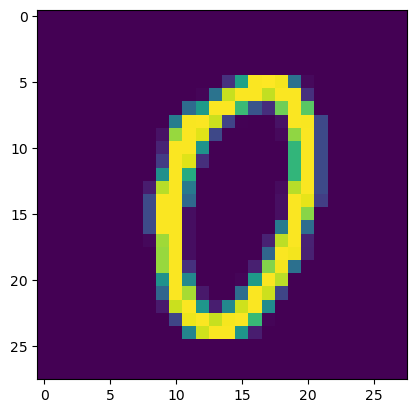

In [22]:
a = images[idx].reshape(28, 28)
plt.imshow(a)

In [23]:
def _load_labels(file_name):
    with gzip.open(file_name, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)
    return labels

In [24]:
labels = _load_labels(f"{dataset_dir}/{key_file['test_labels']}")

In [25]:
labels[idx]

9

#### _create_dataset() 

In [26]:
def _create_dataset():
    dataset = {}
    dataset['train_images'] = _load_images(f"{dataset_dir}/{key_file['train_images']}")
    dataset['train_labels'] = _load_labels(f"{dataset_dir}/{key_file['train_labels']}")
    dataset['test_images'] = _load_images(f"{dataset_dir}/{key_file['test_images']}")
    dataset['test_labels'] = _load_labels(f"{dataset_dir}/{key_file['test_labels']}")
    
    with open(f"{dataset_dir}/{dataset_pkl}", 'wb') as f:
        print(f"Pickle: {dataset_dir}/{dataset_pkl} is being created")
        pickle.dump(dataset, f)
        print('Done.')
    return dataset

In [27]:
dataset = _create_dataset()

Pickle: C:/Users/Nikhi/Pattern Recognition/HW5-2/mnist.pkl is being created
Done.


Label: 9


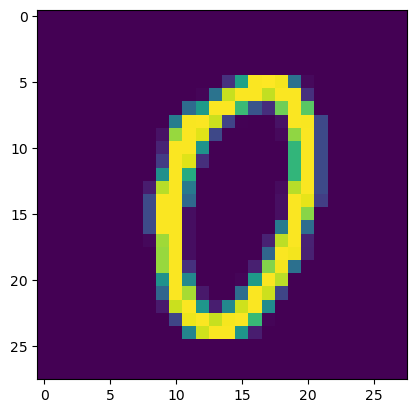

In [28]:
plt.imshow(dataset['train_images'][idx].reshape(28, 28))
print(f"Label: {dataset['test_labels'][idx]}")

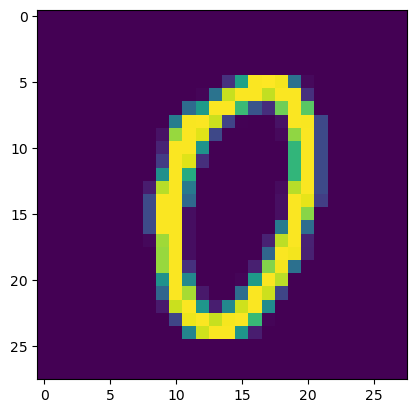

In [29]:
img = dataset['train_images'][idx].reshape(28, 28)
plt.imshow(img)

#### _change_one_hot_label()

In [30]:
def _change_one_hot_label(y, num_class):
    t = np.zeros((y.size, num_class))
    for idx, row in enumerate(t):
        row[y[idx]] = 1
    return t

#### Show an example of one_hot_encoded result.

In [31]:
y = np.array([1, 0, 9, 8])
one_hot_y = _change_one_hot_label(y, 10)

In [32]:
print(y)
print(one_hot_y)

[1 0 9 8]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


#### _init_dataset

In [33]:
def _init_dataset():
    _download_all()
    if os.path.exists(f'{dataset_dir}/{dataset_pkl}') is False:
        with open(f'{dataset_dir}/{dataset_pkl}', 'rb')as f:
            print(f'Pickle: {dataset_dir}/{dataset_pkl} already exists.')
            print('Loading....')
            dataset = pickle.load(f)
            print('Done.')
    else:
        dataset = _create_dataset()
    
    return dataset

In [34]:
# Clear the dictionary for testing the loading dataset
dataset = {}

In [35]:
dataset = _init_dataset()

Processing train-images-idx3-ubyte.gz
File: train-images-idx3-ubyte.gz already exists.
Processing train-labels-idx1-ubyte.gz
File: train-labels-idx1-ubyte.gz already exists.
Processing train-images-idx3-ubyte.gz
File: train-images-idx3-ubyte.gz already exists.
Processing t10k-labels-idx1-ubyte.gz
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: C:/Users/Nikhi/Pattern Recognition/HW5-2/mnist.pkl is being created
Done.


In [37]:
dataset['test_images'].shape

(60000, 784)

#### MnistData class

In [38]:
import urllib.request
import gzip
import numpy as np
import pickle
import os

In [59]:
import os
import urllib.request
import numpy as np
import pickle
import gzip

class MnistData:
    image_size = 28*28
    dataset_dir = 'C:/Users/Nikhi/Pattern Recognition/HW5-2'
    dataset_pkl = 'mnist.pkl'
    url_base = 'http://jrkwon.com/data/ece5831/mnist/'

    key_file = {
        'train_images': 'train-images-idx3-ubyte.gz',
        'train_labels': 'train-labels-idx1-ubyte.gz',
        'test_images': 't10k-images-idx3-ubyte.gz',
        'test_labels': 't10k-labels-idx1-ubyte.gz'
    }

    def __init__(self):
        self.dataset = {}
        self.dataset_pkl_path = os.path.join(self.dataset_dir, self.dataset_pkl)
        self._init_dataset()

    def _change_one_hot_label(self, y, num_class):
        t = np.zeros((y.size, num_class))
        for idx, row in enumerate(t):
            row[y[idx]] = 1
        return t

    def download(self, file_name):
        dataset_dir = 'C:/Users/Nikhi/Pattern Recognition/HW5-2'
        if not os.path.exists(dataset_dir):
            os.makedirs(dataset_dir)  # Create the directory if it doesn't exist
        file_path = os.path.join(dataset_dir, file_name)

        # Check if the file already exists
        if os.path.exists(file_path):
            print(f'File: {file_name} already exists.')
            return

        # Prepare the request with Google Chrome User-Agent
        url = self.url_base + file_name
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36',
            'Accept': 'application/octet-stream'
        }
        request = urllib.request.Request(url, headers=headers)

        # Attempt the download with error handling
        try:
            print(f'Downloading {file_name}...')
            with urllib.request.urlopen(request) as response, open(file_path, 'wb') as out_file:
                out_file.write(response.read())
            print('Download completed:', file_name)
        except urllib.error.HTTPError as e:
            print(f'HTTPError: {e.code} - {e.reason}')
        except Exception as e:
            print(f'Error downloading {file_name}: {str(e)}')

    def _download_all(self):
        for file_name in self.key_file.values():
            # Place your file download or processing logic here
            print(f"Processing {file_name}")
            self.download(file_name)

    def _load_images(self, file_name):
        with gzip.open(file_name, 'rb') as f:
            images = np.frombuffer(f.read(), np.uint8, offset=16)
        images = images.reshape(-1, self.image_size)
        return images

    def _load_labels(self, file_name):
        with gzip.open(file_name, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
        return labels

    def _create_dataset(self):
        self.dataset['train_images'] = self._load_images(f"{self.dataset_dir}/{self.key_file['train_images']}")
        self.dataset['train_labels'] = self._load_labels(f"{self.dataset_dir}/{self.key_file['train_labels']}")
        self.dataset['test_images'] = self._load_images(f"{self.dataset_dir}/{self.key_file['test_images']}")
        self.dataset['test_labels'] = self._load_labels(f"{self.dataset_dir}/{self.key_file['test_labels']}")

        with open(f"{self.dataset_pkl_path}", 'wb') as f:
            print(f"Pickle: {self.dataset_pkl_path} is being created")
            pickle.dump(self.dataset, f)
            print('Done.')

    def _init_dataset(self):
        self._download_all()
        if os.path.exists(f'{self.dataset_pkl_path}'):
            with open(f"{self.dataset_pkl_path}", 'rb') as f:
                print(f'Pickle: {self.dataset_pkl_path} already exists.')
                print('Loading....')
                self.dataset = pickle.load(f)
                print('Done.')
        else:
            self._create_dataset()


In [60]:
mnist_data = MnistData()
print("Dataset keys:", mnist_data.dataset.keys())  # This should include 'test_labels'

Processing train-images-idx3-ubyte.gz
File: train-images-idx3-ubyte.gz already exists.
Processing train-labels-idx1-ubyte.gz
File: train-labels-idx1-ubyte.gz already exists.
Processing t10k-images-idx3-ubyte.gz
File: t10k-images-idx3-ubyte.gz already exists.
Processing t10k-labels-idx1-ubyte.gz
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: C:/Users/Nikhi/Pattern Recognition/HW5-2\mnist.pkl already exists.
Loading....
Done.
Dataset keys: dict_keys(['train_images', 'train_labels', 'test_images', 'test_labels'])


In [ ]:
def _init_dataset(self):
    self._download_all()  # Ensure all necessary files are downloaded
    
    # If the pickle file exists, load the dataset from it
    if os.path.exists(self.dataset_pkl_path):
        with open(self.dataset_pkl_path, 'rb') as f:
            print(f'Pickle: {self.dataset_pkl_path} already exists.')
            print('Loading....')
            self.dataset = pickle.load(f)
            print('Done.')
    # Otherwise, create the dataset and save it to a pickle file
    else:
        self._create_dataset()  # Fixed the missing 'self'


In [55]:
import numpy as np
import gzip
import os
import urllib.request
import pickle

class MnistData:
    image_size = 28*28
    dataset_dir = 'C:/Users/Nikhi/Pattern Recognition/HW5-2'
    dataset_pkl = 'mnist.pkl'
    url_base = 'http://jrkwon.com/data/ece5831/mnist/' 
    
    key_file = {
        'train_images':'train-images-idx3-ubyte.gz',
        'train_labels':'train-labels-idx1-ubyte.gz',
        'test_images': 'train-images-idx3-ubyte.gz',
        'test_labels': 't10k-labels-idx1-ubyte.gz'
    }

    def __init__ (self):
        self.dataset = {}
        self.dataset_pkl_path = os.path.join(self.dataset_dir, self.dataset_pkl)

        self._init_dataset()

    @staticmethod
    def _change_one_hot_label(y, num_class):
        t = np.zeros((y.size, num_class))
        for idx, row in enumerate(t):
            row[y[idx]] = 1
        return t

    def download(self, file_name):
        # Construct the directory path
        dataset_dir = 'C:/Users/Nikhi/Pattern Recognition/HW5-2'
    
        # Ensure the directory exists
        if not os.path.exists(dataset_dir):
            os.makedirs(dataset_dir)  # Create the directory if it doesn't exist

        file_path = os.path.join(dataset_dir, file_name)

        # Check if the file already exists
        if os.path.exists(file_path):
            print(f'File: {file_name} already exists.')
            return

    # Prepare the request with Google Chrome User-Agent
        url = url_base + file_name
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36',
            'Accept': 'application/octet-stream'
        }
        request = urllib.request.Request(url, headers=headers)

        # Attempt the download with error handling
        try:
            print(f'Downloading {file_name}...')
            with urllib.request.urlopen(request) as response, open(file_path, 'wb') as out_file:
                out_file.write(response.read())
            print('Download completed:', file_name)
        except urllib.error.HTTPError as e:
            print(f'HTTPError: {e.code} - {e.reason}')
        except Exception as e:
            print(f'Error downloading {file_name}: {str(e)}')


    def _download_all(self):
        for file_name in key_file.values():
            # Place your file download or processing logic here
            print(f"Processing {file_name}")
            download(file_name)
            # print("Downloaded: ", file_name)

    def _load_images(self, file_name):
        with gzip.open(file_name, 'rb') as f:
            images = np.frombuffer(f.read(), np.uint8, offset=16)
        images = images.reshape(-1, self.image_size)
        return images

    def _load_labels(self, file_name):
        with gzip.open(file_name, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
        return labels

    def _create_dataset(self):
        print("Loading train images...")
        train_images = self._load_images(os.path.join(self.dataset_dir, self.key_file['train_images']))
        print(f"Train images shape: {train_images.shape}")
        
        print("Loading train labels...")
        train_labels = self._load_labels(os.path.join(self.dataset_dir, self.key_file['train_labels']))
        print(f"Train labels shape: {train_labels.shape}")
        
        print("Loading test images...")
        test_images = self._load_images(os.path.join(self.dataset_dir, self.key_file['test_images']))
        print(f"Test images shape: {test_images.shape}")
        
        print("Loading test labels...")
        test_labels = self._load_labels(os.path.join(self.dataset_dir, self.key_file['test_labels']))
        print(f"Test labels shape: {test_labels.shape}")
        
        # Now populate the self.dataset dictionary
        self.dataset['train_images'] = train_images
        self.dataset['train_labels'] = train_labels
        self.dataset['test_images'] = test_images
        self.dataset['test_labels'] = test_labels

        # Save the dataset as a pickle
        with open(self.dataset_pkl_path, 'wb') as f:
            print(f'Pickle: {self.dataset_pkl_path} is being created')
            pickle.dump(self.dataset, f)
            print('Done.')

    def _init_dataset(self):
        self._download_all()  # Ensure all necessary files are downloaded
        
        if os.path.exists(self.dataset_pkl_path):
            with open(self.dataset_pkl_path, 'rb') as f:
                print(f'Pickle: {self.dataset_pkl_path} already exists.')
                print('Loading....')
                self.dataset = pickle.load(f)
                print('Done.')
        else:
            self._create_dataset() 

    def load(self):
        #normalize image datasets
        for key in ('train_images', 'test_images'):
            self.dataset[key] = self.dataset[key].astype(np.float32)
            self.dataset[key] /= 255.0

        # one-hot encoding
        for key in('train_labels', 'test_labels'):
            self.dataset[key] = _change_one_hot_label(self.dataset[key], 10)

        return (self.dataset['train_images'], self.dataset['train_labels']), \
                (self.dataset['test_images'], self.dataset['test_labels'])


#### Show the class is working with four examples (two from train and two from test).

In [56]:
mnist_data = MnistData()


# Check if the dataset is loaded properly
print("Dataset keys:", mnist_data.dataset.keys())  # Should include 'test_labels'

# Access the test labels
test_labels = mnist_data.dataset['test_labels']
(train_images, train_labels), (test_images, test_labels) = mnist_data.load()
# Display the first few test labels
print("First 10 test labels:", test_labels[:10])


Processing train-images-idx3-ubyte.gz
File: train-images-idx3-ubyte.gz already exists.
Processing train-labels-idx1-ubyte.gz
File: train-labels-idx1-ubyte.gz already exists.
Processing train-images-idx3-ubyte.gz
File: train-images-idx3-ubyte.gz already exists.
Processing t10k-labels-idx1-ubyte.gz
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: C:/Users/Nikhi/Pattern Recognition/HW5-2\mnist.pkl already exists.
Loading....
Done.
Dataset keys: dict_keys(['train_images', 'train_labels', 'test_images', 'test_labels'])
First 10 test labels: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [57]:
test_images.shape

(60000, 784)

In [58]:
labels.shape


(10000,)